In [ ]:
import re
from bs4 import BeautifulSoup as bs
import pandas
import numpy as np
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
source = []
title = []
author = []
date = []
target = [] 

In [20]:
def web_scraping(page_nub):
    global source
    global title
    global author
    global date
    global target
    
    s = []
    t = []
    s_author = []
    s_date = []
    ta = []
    
   
    url = "https://www.politifact.com/factchecks/list/?page="+str(page_nub)
    respons = requests.get(url)
    soup = bs(respons.content, "html.parser")
    #source
    statement__meta = soup.find_all("div", attrs = {"class","m-statement__meta" })
    # title
    statement__quote = soup.find_all("div", attrs = {"class", "m-statement__quote"} )
    #author
    statement__footer = soup.find_all("footer", attrs = {"class","m-statement__footer" })
    # getting target
    statement__meter = soup.find_all("div", attrs = {"class", "m-statement__meter"})
    
    for i in statement__meta:
        app_name = i.find("a", attrs = { "a", "m-statement__name"}).get("title")
        s.append(app_name)
        #print(s[1])
    for i in range(len(statement__quote)):
        t.append(statement__quote[i].text.strip())
    for i in range(len(statement__footer)):
        author_date =statement__footer[i].text.strip()
        split_author_date = author_date.split("•")
        author_name = split_author_date [0]
        author_date = split_author_date[1]
        s_author.append(author_name)
        s_date.append(author_date)    
    for i in statement__meter:
        link = i.find("div", attrs = {"class","c-image"}).find("img").get("alt")
        ta.append(link)
    
    source = source + s
    title = title + t
    author = author + s_author
    date = date + s_date
    target = target + ta

In [21]:
n = 708
for i in range(1,n):
    web_scraping(i)

In [22]:
data = pandas.DataFrame({"author": author,"title": title , "source": source ,"date":date,"target":target})

In [23]:
data.to_csv("web_scraping.csv")

In [3]:
data = pandas.read_csv("C:/Users/kiran/Desktop/projrct_text/web_scraping.csv")

In [ ]:
positive_word = []
negative_word = []
with open("C:/Users/kiran/Desktop/projrct_text/negative-words.txt", "r") as neg:
  negativewords = neg.read().split("\n")
with open('C:/Users/kiran/Desktop/projrct_text/positive-words.txt', "r") as pos:
    positive = pos.read().split("\n")
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()    
nltk.download('omw-1.4')
for i in range(len(data['title'])):
    print(i)
    perfect_sen = []
    sent = re.sub("[^A-Za-z" "]+", " ", str(data['title'][i])).lower()
    sentence = word_tokenize(sent)
    for a in sentence:
        if len(a) >= 3:
            word = lem.lemmatize(a) 
            perfect_sen.append(word)
            if word in positive:
                positive.append(word)
            if word in negativewords:
                negative_word.append(word)
                
    data['title'][i] = " ".join(perfect_sen)       

In [5]:
positive_word = " ".join(positive_word)
negative_word = " ".join(negative_word)

In [6]:
data.to_csv("all_ok.csv")

In [6]:
print(len(positive_word))
print(len(negative_word))

0
76585


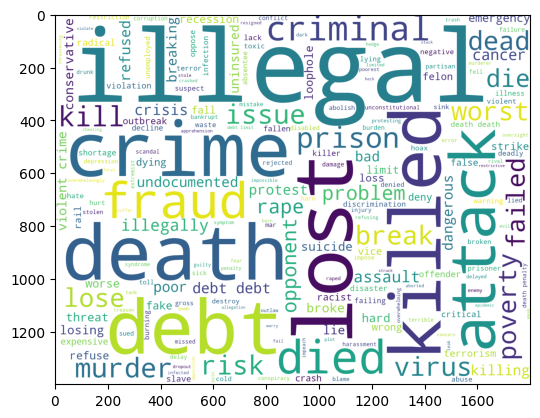

In [7]:
wordcloud_ip = WordCloud(background_color='White',width=1800,height=1400).generate(negative_word)
plt.imshow(wordcloud_ip)

In [5]:
data.shape

(21210, 6)

In [6]:
data.head()

,Unnamed: 0,author,title,source,date,target
0,0,By Yacob Reyes,gov ron desantis raised tax the middle class m...,Charlie Crist,"September 2, 2022",barely-true
1,1,By Amy Sherman,alaska voter voted for republican but thanks c...,Tom Cotton,"September 2, 2022",barely-true
2,2,By Madeline Heim,say tim michels doesn think gay people should ...,Democratic Party of Wisconsin,"September 2, 2022",barely-true
3,3,By Tom Kertscher,three church were targeted during arson attack...,CatholicVote,"September 1, 2022",barely-true
4,4,By Tori Gantz,joe biden and raphael warnock are spending bil...,Herschel Walker,"September 1, 2022",half-true


<AxesSubplot:xlabel='target', ylabel='count'>

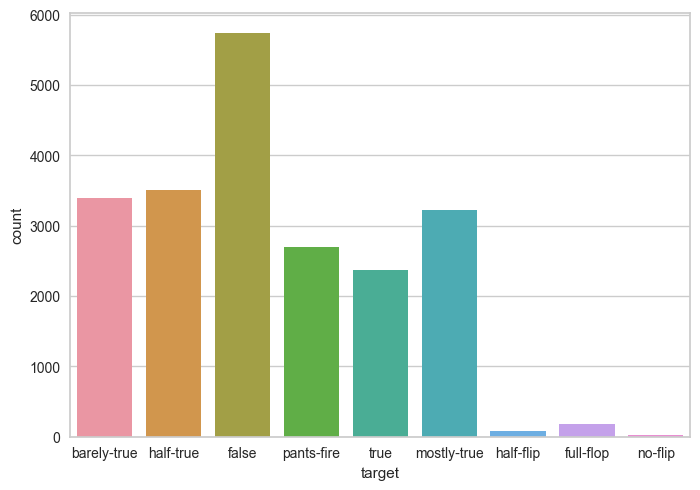

In [29]:
seaborn.countplot(data["target"])

In [30]:
data['target'].value_counts()

false          5733
half-true      3511
barely-true    3397
mostly-true    3226
pants-fire     2701
true           2366
full-flop       174
half-flip        76
no-flip          26
Name: target, dtype: int64

In [7]:
data["target"].replace(to_replace=["half-true", "barely-true", "mostly-true", "true"], value = 1, inplace = True)

In [8]:
data["target"].replace(to_replace =["false", "full-flop", "half-flip", "pants-fire"], value = 0 ,inplace = True)

In [9]:
data["target"].value_counts()

1          12500
0           8684
no-flip       26
Name: target, dtype: int64

In [10]:
data.drop(data[data["target"] == "no-flip"].index, inplace = True, axis=0)

<AxesSubplot:xlabel='target', ylabel='count'>

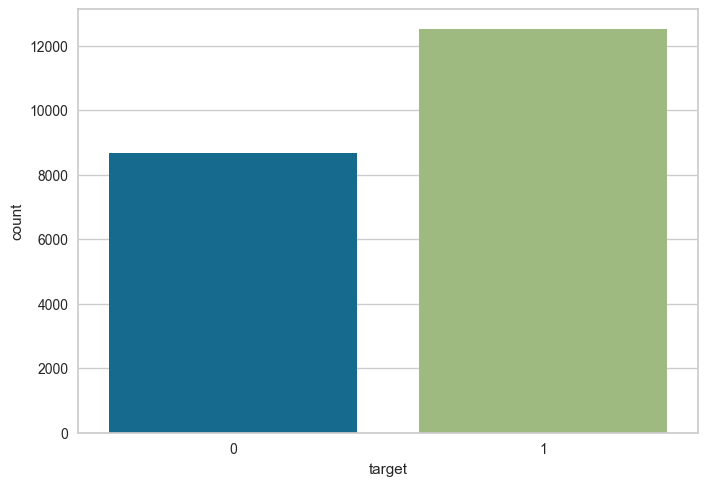

In [35]:
seaborn.countplot(data['target'])

In [11]:
data.columns

Index(['Unnamed: 0', 'author', 'title', 'source', 'date', 'target'], dtype='object')

In [12]:
data.describe()

,Unnamed: 0
count,21184.000000
mean,10599.772470
std,6122.826844
min,0.000000
25%,5296.750000
50%,10597.500000
75%,15899.250000
max,21209.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21184 entries, 0 to 21209
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21184 non-null  int64 
 1   author      21184 non-null  object
 2   title       21184 non-null  object
 3   source      21184 non-null  object
 4   date        21184 non-null  object
 5   target      21184 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [14]:
x = data.drop(labels=['author', 'source', 'date', 'target'], axis = 1)
y = data['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [15]:
x_train.shape,x_test.shape

((14193, 2), (6991, 2))

In [16]:
y_train = y_train.astype("int64")
y_test = y_test.astype("int64")

In [17]:
tfidf = TfidfVectorizer()
tfidf.fit(x_train["title"])
tfidf_x_train = tfidf.transform(x_train['title'])
tfidf_x_test = tfidf.transform(x_test['title'])

In [18]:
tfidf_x_train.shape,tfidf_x_test.shape

((14193, 12396), (6991, 12396))

In [19]:
classifier = PassiveAggressiveClassifier()
classifier.fit(tfidf_x_train,y_train)

PassiveAggressiveClassifier()

In [20]:
pred_train = classifier.predict(tfidf_x_train)
pred_test = classifier.predict(tfidf_x_test)

In [21]:
accuracy_score(y_train, pred_train)

0.9608257591770591

<AxesSubplot:>

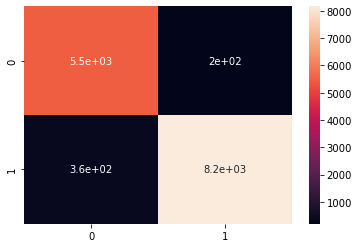

In [22]:
confusion_train = confusion_matrix(pred_train, y_train)
seaborn.heatmap(confusion_train, annot=True)

In [23]:
accuracy_score(y_test, pred_test,)

0.6316692890859676

<AxesSubplot:>

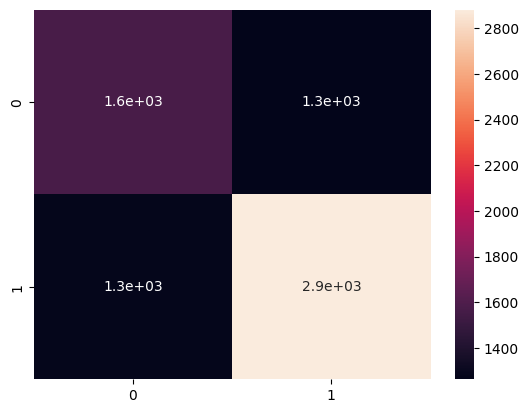

In [23]:
confusion_test = confusion_matrix(pred_test, y_test)
seaborn.heatmap(confusion_test, annot=True)

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3073, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(tfidf_x_train, y_train)

LogisticRegression(max_iter=1000, random_state=3073)

In [25]:
lrpred_train = lr.predict(tfidf_x_train)
lrpred_test = lr.predict(tfidf_x_test)

In [26]:
accuracy_score(y_train, lrpred_train)

0.8065948002536462

<AxesSubplot:>

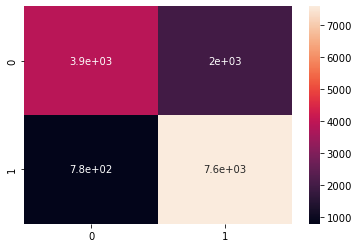

In [27]:
lrconfusion_train = confusion_matrix(y_train, lrpred_train)
seaborn.heatmap(lrconfusion_train, annot=True)

In [28]:
accuracy_score(y_test, lrpred_test,)

0.7094836217994565

<AxesSubplot:>

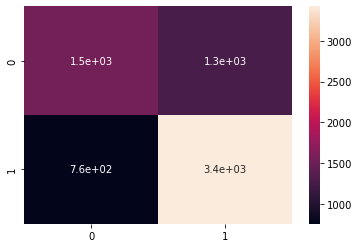

In [32]:
confusion_test = confusion_matrix(y_test, lrpred_test,)
seaborn.heatmap(confusion_test, annot=True)

In [29]:
import pickle
pickle.dump(lr, open('pred.pkl','wb'))
pickle.dump(tfidf,open("tfidf.pkl","wb"))